In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
customer_data=pd.read_csv("segmentation data.csv")

In [93]:
customer_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [94]:
mn=MinMaxScaler()
customer_data_scaled=customer_data.drop(columns=['ID']).copy()
customer_data_scaled[['Age','Income']]=mn.fit_transform(customer_data_scaled[['Age','Income']])

In [95]:
customer_data_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [96]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [97]:
knn_rng=range(2,10)
parama=['silhouette_score','calinski_harabasz_score','davies_bouldin_score']
sile_score=[]
for k in knn_rng:
    km=KMeans(n_clusters=k)
    km.fit(customer_data_scaled)
    sile_score.append(silhouette_score(customer_data_scaled,km.labels_))

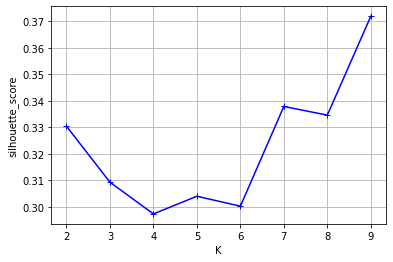

In [98]:
plt.plot(knn_rng,sile_score,'b+-')
plt.xlabel('K')
plt.ylabel(parama[0])
plt.grid()
plt.show()

In [99]:
calniki_score=[]
for k in knn_rng:
    km=KMeans(n_clusters=k)
    km.fit(customer_data_scaled)
    calniki_score.append(silhouette_score(customer_data_scaled,km.labels_))

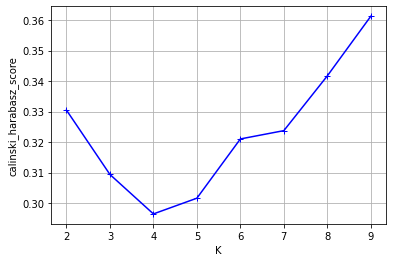

In [100]:
plt.plot(knn_rng,calniki_score,'b+-')
plt.xlabel('K')
plt.ylabel(parama[1])
plt.grid()
plt.show()

In [101]:
davies_score=[]
for k in knn_rng:
    km=KMeans(n_clusters=k)
    km.fit(customer_data_scaled)
    davies_score.append(silhouette_score(customer_data_scaled,km.labels_))

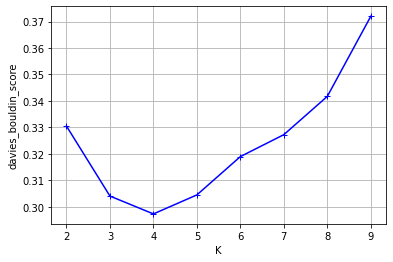

In [102]:
plt.plot(knn_rng,davies_score,'b+-')
plt.xlabel('K')
plt.ylabel(parama[2])
plt.grid()
plt.show()

In [103]:
sse=[]
for k in knn_rng:
    km=KMeans(n_clusters=k)
    km.fit(customer_data_scaled)
    sse.append(km.inertia_)

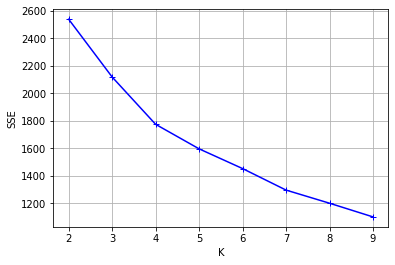

In [104]:
plt.plot(knn_rng,sse,'b+-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(customer_data_scaled)

In [106]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [107]:
kmeans=KMeans(n_clusters=9, random_state=0).fit(customer_data_scaled)

In [108]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [109]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [110]:
X_pca_df.head()

,X1,X2,X3,Labels
0,1.297743,0.416852,1.081996,7
1,0.939311,0.573500,-0.738338,4
2,-0.868676,-0.637267,0.727222,2
3,0.489584,-0.408119,0.421494,1
4,0.487005,-0.398943,0.461649,1


In [111]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [112]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()